In [1]:
import numpy as np
from scatter_letters import sl
from matplotlib import pyplot as plt
from numpy.linalg import norm

In [2]:
words = ['LAMMPS_', 'TUTORIALS_']

## Measure the total width of the words

In [3]:
width_words = []
for cpt_word, myword in enumerate(words):
    mytext = sl.text_to_data(myword, intensity = 50, repeat=False)
    total_width_word = 0
    for cpt_letter, letter in enumerate(myword[:-1]):
        data_letter = np.array(mytext[cpt_letter])
        data_letter[0] -= np.min(data_letter[0])
        width_letter = np.max(data_letter[0])
        total_width_word += width_letter
    width_words.append(total_width_word)

Coordinates:   0%|          | 0/7 [00:00<?, ?it/s]

Coordinates:   0%|          | 0/10 [00:00<?, ?it/s]

## Place the words

Coordinates:   0%|          | 0/7 [00:00<?, ?it/s]

Coordinates:   0%|          | 0/10 [00:00<?, ?it/s]

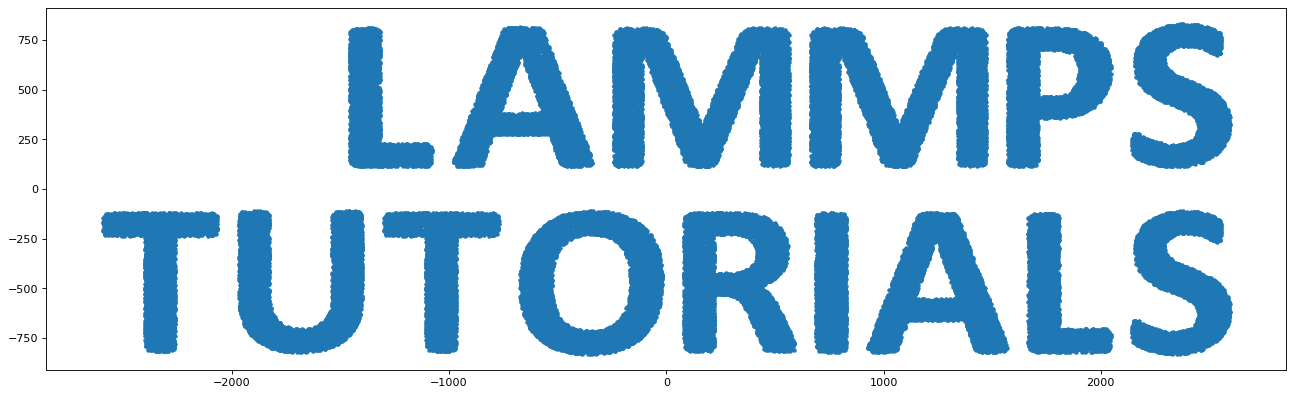

In [8]:
n_letter = 0
space_letter_x = 100
space_letter_y = 100
space_box_y = 200

plt.figure(figsize=(20, 6), dpi=80)

for cpt_word, myword in enumerate(words):

    mytext = sl.text_to_data(myword, intensity = 50, repeat=False)

    width_letter_total = 0
    
    for cpt_letter, letter in enumerate(mytext[:-1]):
        data_letter = np.array(mytext[cpt_letter])
        data_letter[0] -= np.min(data_letter[0])
        width_letter = np.max(data_letter[0])
        height_letter = np.max(data_letter[1])
        data_letter[0] += width_letter_total
        data_letter[0] += space_letter_x*cpt_letter
        data_letter[0] -= width_words[cpt_word]
        data_letter[0] -= (len(myword)-2)*space_letter_x
        data_letter[1] -= np.min(data_letter[1])
        data_letter[1] -= space_letter_y*cpt_word
        data_letter[1] -= height_letter*cpt_word
        width_letter_total += width_letter
        
        
        
        if n_letter == 0:
            all_letters = data_letter
        else:
            all_letters = np.vstack([all_letters.T, data_letter.T]).T
            
        n_letter += 1
        
all_letters = all_letters.astype('float64')
all_letters[0] -= (np.max(all_letters[0]) + np.min(all_letters[0]))/2
all_letters[1] -= (np.max(all_letters[1]) + np.min(all_letters[1]))/2
        
plt.plot(all_letters[0], all_letters[1], '.')
plt.show()

## Place the atoms

In [10]:
Lx = np.max(all_letters[0]) - np.min(all_letters[0]) + 2*space_letter_x
Ly = np.max(all_letters[1]) - np.min(all_letters[1]) + 2*space_box_y
box = np.array([Lx, Ly])
atoms = []
cpt_atoms = 0
rescaling = 4.5
N_total = 35000
for N in range(N_total):
    cpt_atoms += 1
    x = np.random.random()*Lx - Lx/2
    y = np.random.random()*Ly - Ly/2
    d = np.min(norm(np.remainder(all_letters.T - np.array([x,y]) + box/2., box) - box/2., axis=1))
    if d < 10:
        atoms.append([cpt_atoms, 1, x/rescaling, y/rescaling, 0])
    else:
        atoms.append([cpt_atoms, 2, x/rescaling, y/rescaling, 0])
atoms = np.array(atoms)

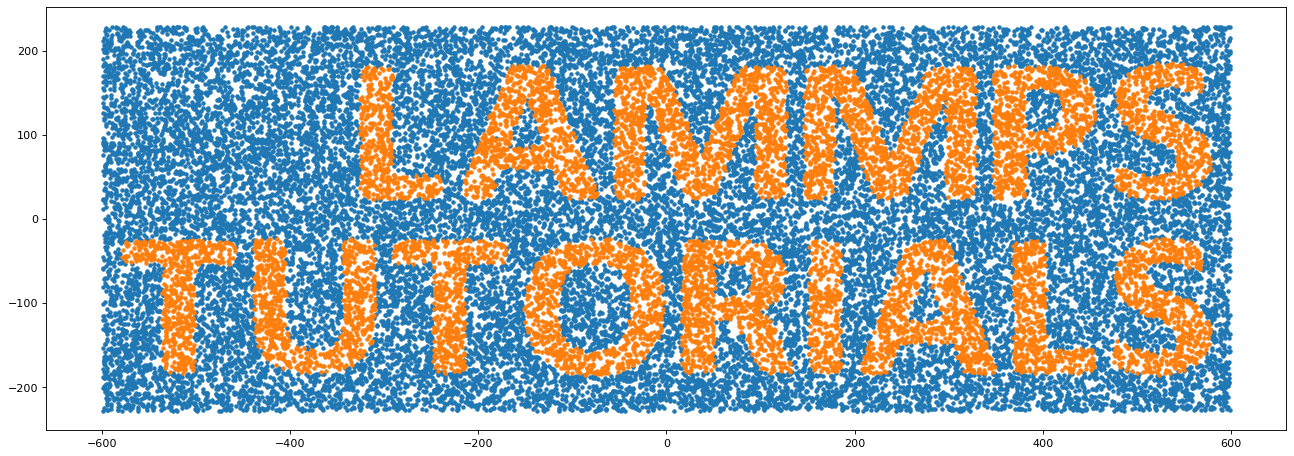

In [11]:
plt.figure(figsize=(20, 7), dpi=80)
plt.plot(atoms[atoms.T[1] == 2].T[2], atoms[atoms.T[1] == 2].T[3], '.')
plt.plot(atoms[atoms.T[1] == 1].T[2], atoms[atoms.T[1] == 1].T[3], '.')
plt.show()

In [12]:
f = open("data.lammps", "w")
f.write('# LAMMPS data file \n\n')
f.write(str(cpt_atoms)+' atoms\n')
f.write('\n')
f.write('2 atom types\n')
f.write('\n')
f.write(str(-Lx/2/rescaling)+' '+str(Lx/2/rescaling)+' xlo xhi\n')
f.write(str(-Ly/2/rescaling)+' '+str(Ly/2/rescaling)+' ylo yhi\n')
f.write('-1 1 zlo zhi\n')
f.write('\n')
f.write('Atoms\n')
f.write('\n')
for nlin in range(len(atoms)):
    newline = atoms[nlin]
    for col in range(len(newline)):
        if col < 3:
            f.write(str(int(newline[col]))+' ')
        else :
            f.write(str(newline[col])+' ')
    f.write('\n')
f.close()